In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
FILENAME = 'dataset customer segment dvdrental newwwww-1691749580427.csv'
df = pd.read_csv(FILENAME)
df.head()

,customer_id,first_name,last_name,movie_title,payment_amount,movie_genre,payment_date,film_rating
0,1,Mary,Smith,Savannah Town,5.99,Drama,2007-02-14 23:22:38.996,PG-13
1,1,Mary,Smith,Adaptation Holes,5.99,Documentary,2007-02-14 23:22:38.996,NC-17
2,1,Mary,Smith,Bikini Borrowers,5.99,Animation,2007-02-14 23:22:38.996,NC-17
3,1,Mary,Smith,Attacks Hate,5.99,Sci-Fi,2007-02-14 23:22:38.996,PG-13
4,1,Mary,Smith,Musketeers Wait,5.99,Classics,2007-02-14 23:22:38.996,PG


In [3]:
len(df)

405315

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405315 entries, 0 to 405314
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_id     405315 non-null  int64  
 1   first_name      405315 non-null  object 
 2   last_name       405315 non-null  object 
 3   movie_title     405315 non-null  object 
 4   payment_amount  405315 non-null  float64
 5   movie_genre     405315 non-null  object 
 6   payment_date    405315 non-null  object 
 7   film_rating     405315 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 24.7+ MB


In [5]:
df = df.rename(columns={'payment_amount': 'amount', 'movie_title':'film_title', 'movie_genre': 'category_name'})

In [6]:
df['amount'].mode().iloc[0]

4.99

In [7]:
df.duplicated().sum()

5722

In [8]:
df = df.drop_duplicates()
df

,customer_id,first_name,last_name,film_title,amount,category_name,payment_date,film_rating
0,1,Mary,Smith,Savannah Town,5.99,Drama,2007-02-14 23:22:38.996,PG-13
1,1,Mary,Smith,Adaptation Holes,5.99,Documentary,2007-02-14 23:22:38.996,NC-17
2,1,Mary,Smith,Bikini Borrowers,5.99,Animation,2007-02-14 23:22:38.996,NC-17
3,1,Mary,Smith,Attacks Hate,5.99,Sci-Fi,2007-02-14 23:22:38.996,PG-13
4,1,Mary,Smith,Musketeers Wait,5.99,Classics,2007-02-14 23:22:38.996,PG
...,...,...,...,...,...,...,...,...
405310,599,Austin,Cintron,Gentlemen Stage,2.99,Foreign,2007-04-30 05:09:45.996,NC-17
405311,599,Austin,Cintron,Lola Agent,2.99,Horror,2007-04-30 05:09:45.996,PG
405312,599,Austin,Cintron,Something Duck,2.99,Drama,2007-04-30 05:09:45.996,NC-17
405313,599,Austin,Cintron,Temple Attraction,2.99,Horror,2007-04-30 05:09:45.996,PG


In [9]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x26341e32470>,
 'caps': [<matplotlib.lines.Line2D at 0x26341e329b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26341e321d0>],
 'medians': [<matplotlib.lines.Line2D at 0x26341e32ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26341e33190>],
 'means': []}

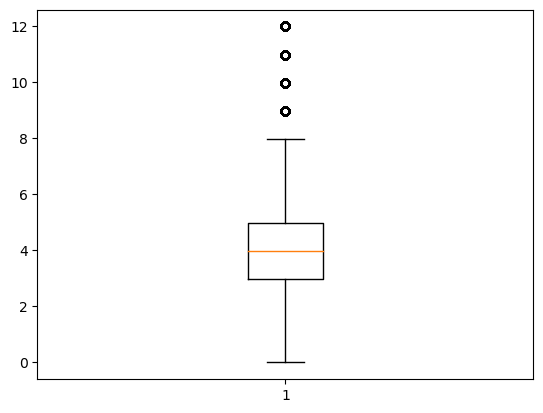

In [10]:
plt.boxplot(df['amount'])

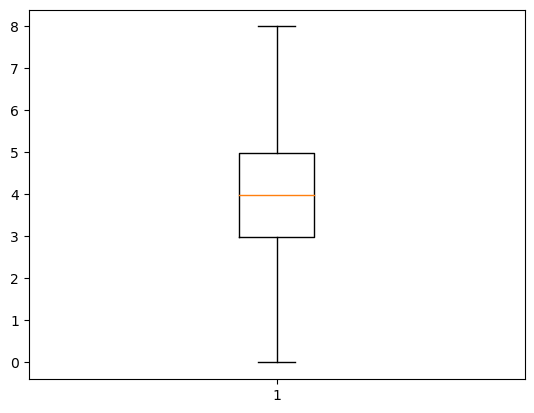

In [11]:
def OutlierDetection(df, col_name): 
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    
    df = df[(df[col_name] >= lower_limit) & (df[col_name] <= upper_limit)]
    plt.boxplot(df[col_name])
    return df

df = OutlierDetection(df, 'amount')

In [12]:
len(df)

377954

In [13]:
df['category_name_encoded'] = df['category_name'].astype('category').cat.codes
df['film_rating_encoded'] = df['film_rating'].astype('category').cat.codes
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16868\1156962192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_name_encoded'] = df['category_name'].astype('category').cat.codes
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16868\1156962192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['film_rating_encoded'] = df['film_rating'].astype('category').cat.codes


,customer_id,first_name,last_name,film_title,amount,category_name,payment_date,film_rating,category_name_encoded,film_rating_encoded
0,1,Mary,Smith,Savannah Town,5.99,Drama,2007-02-14 23:22:38.996,PG-13,6,3
1,1,Mary,Smith,Adaptation Holes,5.99,Documentary,2007-02-14 23:22:38.996,NC-17,5,1
2,1,Mary,Smith,Bikini Borrowers,5.99,Animation,2007-02-14 23:22:38.996,NC-17,1,1
3,1,Mary,Smith,Attacks Hate,5.99,Sci-Fi,2007-02-14 23:22:38.996,PG-13,13,3
4,1,Mary,Smith,Musketeers Wait,5.99,Classics,2007-02-14 23:22:38.996,PG,3,2


### Exploratory Data Analysis (EDA)

#### 1. How does payment vary across customers? 

In [14]:
df['amount'].describe()

count    377954.000000
mean          3.900843
std           2.041979
min           0.000000
25%           2.990000
50%           3.990000
75%           4.990000
max           7.990000
Name: amount, dtype: float64

In [48]:
df['amount'].unique()

array([5.99, 0.99, 4.99, 3.99, 2.99, 1.99, 7.99, 6.99, 3.98, 0.  , 5.98,
       7.98, 1.98])

In [49]:
mode_amount = df['amount'].mode().values[0]
bins = [0, 1, 2, 3, 4.99, 5.99, 6.99, 7.99]


amount_bins = pd.cut(df['amount'], bins=bins, right=False)


bin_counts = amount_bins.value_counts()

max_count = bin_counts.max()
mode_bins = bin_counts[bin_counts == max_count].index


for mode_bin in mode_bins:
    lower_bound = mode_bin.left
    upper_bound = mode_bin.right
    if upper_bound == float('inf'):
        range_str = f"≥ {lower_bound}"
    else:
        range_str = f"{lower_bound} - {upper_bound}"
    print(f"Mode Range: {range_str}")

Mode Range: 4.99 - 5.99


#### 2. How frequent are payments made?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16868\3527285029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_date_frequency'] = pd.to_datetime(df['payment_date'])


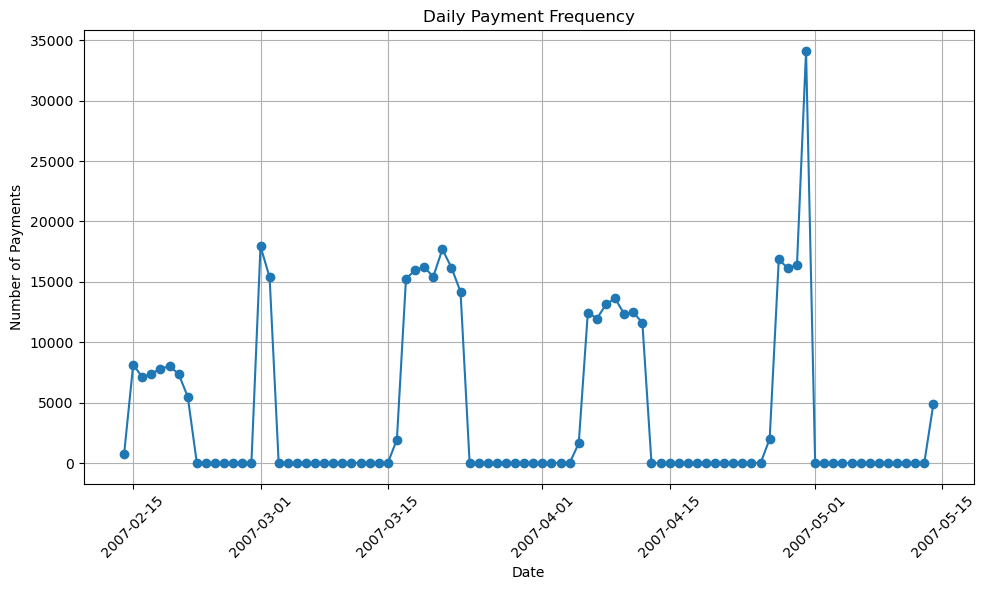

In [16]:
df['payment_date_frequency'] = pd.to_datetime(df['payment_date'])
df.set_index('payment_date_frequency', inplace=True)
payment_frequency_daily = df['amount'].resample('D').count()

plt.figure(figsize=(10, 6))
plt.plot(payment_frequency_daily.index, payment_frequency_daily.values, marker='o')
plt.title('Daily Payment Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Payments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
print(payment_frequency_daily)

payment_date_frequency
2007-02-14     758
2007-02-15    8157
2007-02-16    7111
2007-02-17    7406
2007-02-18    7810
              ... 
2007-05-10       0
2007-05-11       0
2007-05-12       0
2007-05-13       0
2007-05-14    4896
Freq: D, Name: amount, Length: 90, dtype: int64


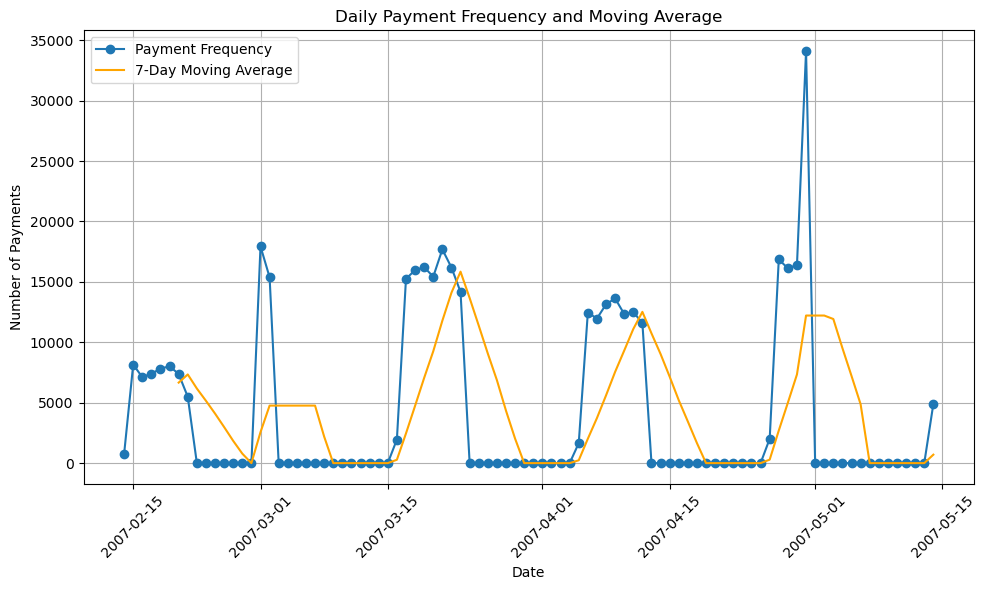

In [18]:
moving_average = payment_frequency_daily.rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(payment_frequency_daily.index, payment_frequency_daily.values, label='Payment Frequency', marker='o')
plt.plot(moving_average.index, moving_average.values, label='7-Day Moving Average', color='orange')
plt.title('Daily Payment Frequency and Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Payments')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Which genre is the most popular? 

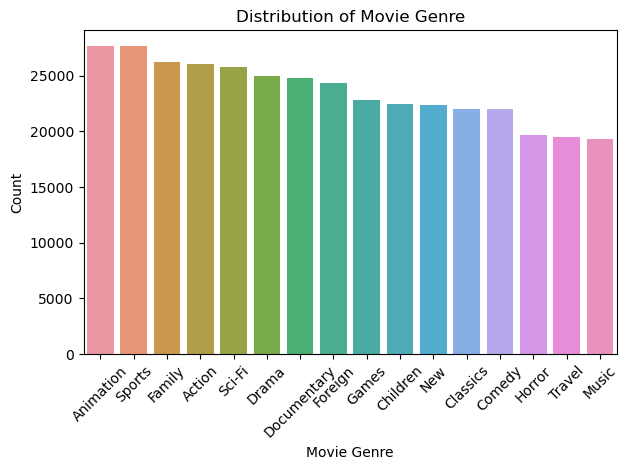

In [19]:
category_counts = df['category_name'].value_counts().sort_values(ascending=False)
sns.countplot(x='category_name', data=df, order=category_counts.index)
plt.title('Distribution of Movie Genre')
plt.xticks(rotation=45)
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [50]:
category_counts

Animation      27705
Sports         27692
Family         26270
Action         26092
Sci-Fi         25799
Drama          25020
Documentary    24832
Foreign        24344
Games          22826
Children       22458
New            22420
Classics       22009
Comedy         21986
Horror         19659
Travel         19520
Music          19322
Name: category_name, dtype: int64

#### 4. Which movies are most frequently rented and generate highest payments? 

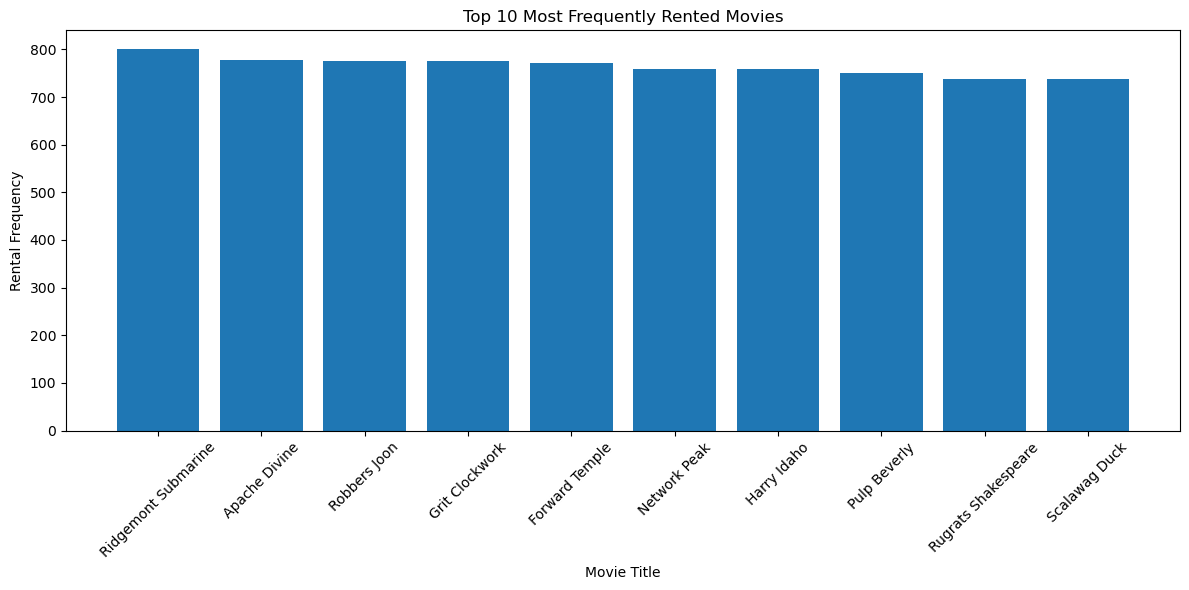

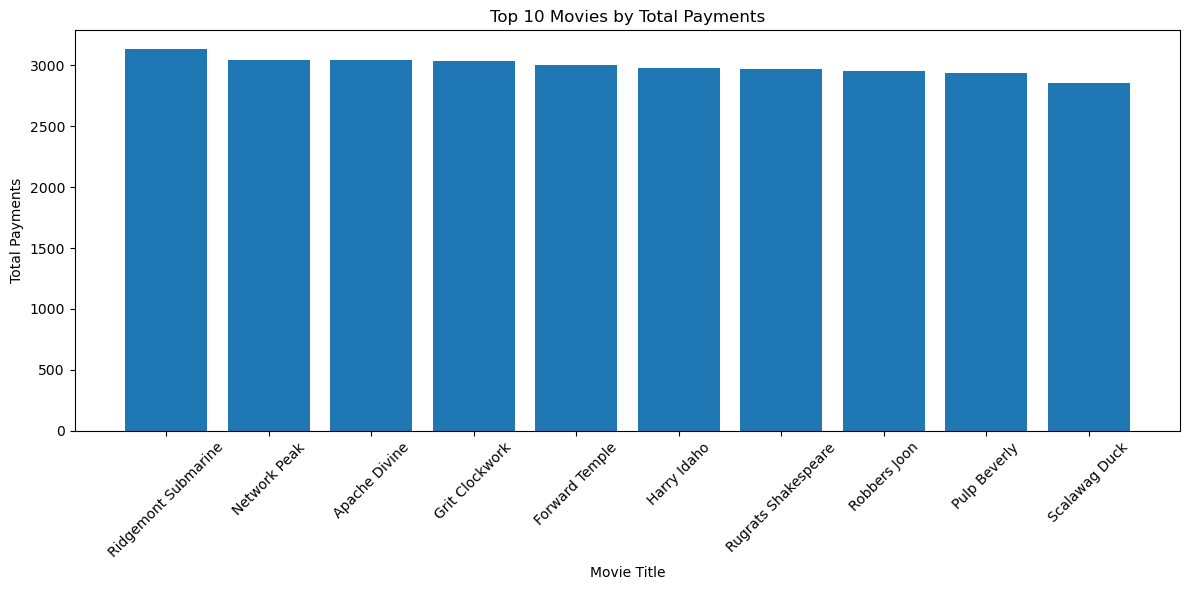

In [20]:
movie_stats = df.groupby('film_title').agg({
    'customer_id': 'count',   
    'amount': 'sum'           
}).reset_index()

movie_stats = movie_stats.sort_values(by='customer_id', ascending=False)

top_n = 10
top_rented_movies = movie_stats.head(top_n)
top_paid_movies = movie_stats.sort_values(by='amount', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_rented_movies['film_title'], top_rented_movies['customer_id'])
plt.title(f'Top {top_n} Most Frequently Rented Movies')
plt.xlabel('Movie Title')
plt.ylabel('Rental Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_paid_movies['film_title'], top_paid_movies['amount'])
plt.title(f'Top {top_n} Movies by Total Payments')
plt.xlabel('Movie Title')
plt.ylabel('Total Payments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
top_rented_movies

,film_title,customer_id,amount
697,Ridgemont Submarine,800,3132.00
29,Apache Divine,778,3048.22
702,Robbers Joon,776,2955.24
361,Grit Clockwork,776,3037.24
312,Forward Temple,771,3003.29
594,Network Peak,759,3048.41
381,Harry Idaho,758,2980.42
671,Pulp Beverly,750,2941.50
714,Rugrats Shakespeare,738,2968.62
733,Scalawag Duck,737,2859.63


In [52]:
top_paid_movies

,film_title,customer_id,amount
697,Ridgemont Submarine,800,3132.00
594,Network Peak,759,3048.41
29,Apache Divine,778,3048.22
361,Grit Clockwork,776,3037.24
312,Forward Temple,771,3003.29
381,Harry Idaho,758,2980.42
714,Rugrats Shakespeare,738,2968.62
702,Robbers Joon,776,2955.24
671,Pulp Beverly,750,2941.50
733,Scalawag Duck,737,2859.63


#### 5. Who are the top 10 renters among customers? And what movie genre do they rent the most?

In [21]:
renter_genre_stats = df.groupby(['first_name','last_name']).agg({
    'amount': 'sum',                    
    'customer_id': 'count',              
    'category_name': lambda x: x.mode()  
}).reset_index()


renter_genre_stats = renter_genre_stats.sort_values(by='amount', ascending=False)


top_n = 10
top_renters = renter_genre_stats.head(top_n)
top_renters

,first_name,last_name,amount,customer_id,category_name
318,Karl,Seal,7463.28,1672,Animation
175,Eleanor,Hunt,7433.60,1840,Sci-Fi
105,Clara,Shaw,7166.04,1596,Drama
379,Marcia,Dean,6620.04,1596,"[Foreign, Games]"
389,Marion,Snyder,6597.94,1406,"[Animation, Drama, Foreign, Travel]"
474,Rhonda,Kennedy,6560.32,1368,"[Games, Sports]"
123,Curtis,Irby,5462.68,1332,"[Action, Family]"
556,Tommy,Collazo,5383.46,1254,"[Comedy, Family]"
536,Tammy,Sanders,5356.65,1476,Family
315,June,Carroll,5279.53,1147,"[Animation, Comedy]"


### Customer Segmentation Creation

#### 1. Recency

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377954 entries, 2007-02-14 23:22:38.996000 to 2007-04-30 05:09:45.996000
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            377954 non-null  int64  
 1   first_name             377954 non-null  object 
 2   last_name              377954 non-null  object 
 3   film_title             377954 non-null  object 
 4   amount                 377954 non-null  float64
 5   category_name          377954 non-null  object 
 6   payment_date           377954 non-null  object 
 7   film_rating            377954 non-null  object 
 8   category_name_encoded  377954 non-null  int8   
 9   film_rating_encoded    377954 non-null  int8   
dtypes: float64(1), int64(1), int8(2), object(6)
memory usage: 26.7+ MB


In [23]:
df['date'] = pd.to_datetime(df['payment_date'])
df['rank'] = df.sort_values(['customer_id', 'date']).groupby(['customer_id'])['date'].rank(method='min').astype(int)
df_rec = df[df['rank'] == 1]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16868\2421876378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['payment_date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16868\2421876378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = df.sort_values(['customer_id', 'date']).groupby(['customer_id'])['date'].rank(method='min').astype(int)


In [24]:
df_rec['recency'] = (df_rec['date'] - pd.to_datetime(min(df_rec['date']))).dt.days

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16868\4177660181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['date'] - pd.to_datetime(min(df_rec['date']))).dt.days


In [25]:
df_rec

,customer_id,first_name,last_name,film_title,amount,category_name,payment_date,film_rating,category_name_encoded,film_rating_encoded,date,rank,recency
payment_date_frequency,,,,,,,,,,,,,
2007-02-14 23:22:38.996,1,Mary,Smith,Savannah Town,5.99,Drama,2007-02-14 23:22:38.996,PG-13,6,3,2007-02-14 23:22:38.996,1,0
2007-02-14 23:22:38.996,1,Mary,Smith,Adaptation Holes,5.99,Documentary,2007-02-14 23:22:38.996,NC-17,5,1,2007-02-14 23:22:38.996,1,0
2007-02-14 23:22:38.996,1,Mary,Smith,Bikini Borrowers,5.99,Animation,2007-02-14 23:22:38.996,NC-17,1,1,2007-02-14 23:22:38.996,1,0
2007-02-14 23:22:38.996,1,Mary,Smith,Attacks Hate,5.99,Sci-Fi,2007-02-14 23:22:38.996,PG-13,13,3,2007-02-14 23:22:38.996,1,0
2007-02-14 23:22:38.996,1,Mary,Smith,Musketeers Wait,5.99,Classics,2007-02-14 23:22:38.996,PG,3,2,2007-02-14 23:22:38.996,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-02-18 04:58:19.996,599,Austin,Cintron,Zorro Ark,1.99,Comedy,2007-02-18 04:58:19.996,NC-17,4,1,2007-02-18 04:58:19.996,1,3
2007-02-18 04:58:19.996,599,Austin,Cintron,Squad Fish,1.99,Sports,2007-02-18 04:58:19.996,PG,14,2,2007-02-18 04:58:19.996,1,3
2007-02-18 04:58:19.996,599,Austin,Cintron,Family Sweet,1.99,Horror,2007-02-18 04:58:19.996,R,10,4,2007-02-18 04:58:19.996,1,3


#### 2. Frequency

In [26]:
freq = df_rec.groupby('customer_id')['date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['customer_id', 'frequency']
rec_freq = df_freq.merge(df_rec,on='customer_id')

In [27]:
rec_freq

,customer_id,frequency,first_name,last_name,film_title,amount,category_name,payment_date,film_rating,category_name_encoded,film_rating_encoded,date,rank,recency
0,1,30,Mary,Smith,Savannah Town,5.99,Drama,2007-02-14 23:22:38.996,PG-13,6,3,2007-02-14 23:22:38.996,1,0
1,1,30,Mary,Smith,Adaptation Holes,5.99,Documentary,2007-02-14 23:22:38.996,NC-17,5,1,2007-02-14 23:22:38.996,1,0
2,1,30,Mary,Smith,Bikini Borrowers,5.99,Animation,2007-02-14 23:22:38.996,NC-17,1,1,2007-02-14 23:22:38.996,1,0
3,1,30,Mary,Smith,Attacks Hate,5.99,Sci-Fi,2007-02-14 23:22:38.996,PG-13,13,3,2007-02-14 23:22:38.996,1,0
4,1,30,Mary,Smith,Musketeers Wait,5.99,Classics,2007-02-14 23:22:38.996,PG,3,2,2007-02-14 23:22:38.996,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15823,599,19,Austin,Cintron,Zorro Ark,1.99,Comedy,2007-02-18 04:58:19.996,NC-17,4,1,2007-02-18 04:58:19.996,1,3
15824,599,19,Austin,Cintron,Squad Fish,1.99,Sports,2007-02-18 04:58:19.996,PG,14,2,2007-02-18 04:58:19.996,1,3
15825,599,19,Austin,Cintron,Family Sweet,1.99,Horror,2007-02-18 04:58:19.996,R,10,4,2007-02-18 04:58:19.996,1,3
15826,599,19,Austin,Cintron,Outbreak Divine,1.99,Games,2007-02-18 04:58:19.996,NC-17,9,1,2007-02-18 04:58:19.996,1,3


#### 3. Monetary Value

In [28]:
rec_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15828 entries, 0 to 15827
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            15828 non-null  int64         
 1   frequency              15828 non-null  int64         
 2   first_name             15828 non-null  object        
 3   last_name              15828 non-null  object        
 4   film_title             15828 non-null  object        
 5   amount                 15828 non-null  float64       
 6   category_name          15828 non-null  object        
 7   payment_date           15828 non-null  object        
 8   film_rating            15828 non-null  object        
 9   category_name_encoded  15828 non-null  int8          
 10  film_rating_encoded    15828 non-null  int8          
 11  date                   15828 non-null  datetime64[ns]
 12  rank                   15828 non-null  int32         
 13  r

In [29]:
#total_spent_by_customer = rec_freq.groupby('customer_id')['amount'].sum().reset_index()
#rec_freq = rec_freq.merge(total_spent_by_customer, on='customer_id', suffixes=('', '_total_spent'))

In [30]:
m = rec_freq.groupby('customer_id')['amount'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['customer_id', 'monetary_value']

In [31]:
rfm = m.merge(rec_freq,on='customer_id')

In [32]:
finaldf = rfm[['customer_id', 'recency', 'frequency', 'monetary_value']]

In [33]:
finaldf

,customer_id,recency,frequency,monetary_value
0,1,0,30,179.70
1,1,0,30,179.70
2,1,0,30,179.70
3,1,0,30,179.70
4,1,0,30,179.70
...,...,...,...,...
15823,599,3,19,37.81
15824,599,3,19,37.81
15825,599,3,19,37.81
15826,599,3,19,37.81


In [34]:
finaldf.duplicated().sum()

15229

In [35]:
finaldf = finaldf.drop_duplicates()
finaldf

,customer_id,recency,frequency,monetary_value
0,1,0,30,179.70
30,2,2,27,80.73
57,3,1,26,181.74
83,4,0,22,109.78
105,5,0,38,151.62
...,...,...,...,...
15704,595,0,30,89.70
15734,596,1,28,55.72
15762,597,3,25,24.75
15787,598,5,22,65.78


recency: 


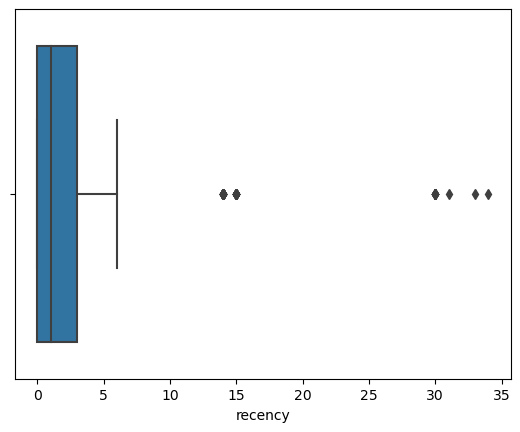

frequency: 


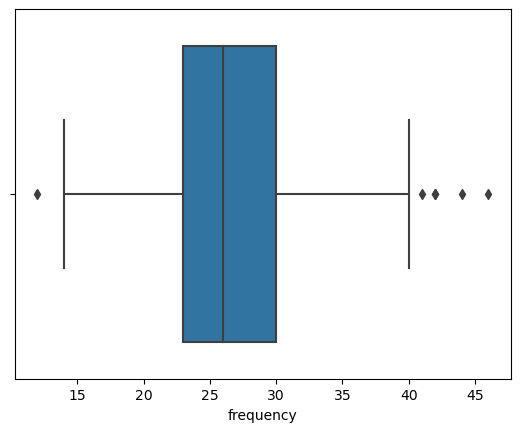

monetary_value: 


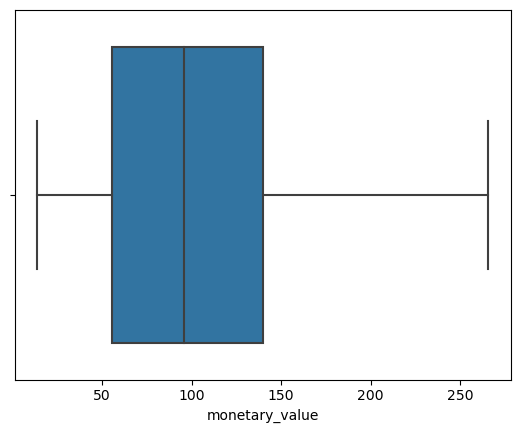

In [36]:
#detecting outliers 
list1 = ['recency', 'frequency', 'monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [37]:
#removing outliers 
from scipy import stats

new_df = finaldf[['recency', 'frequency', 'monetary_value']]
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [38]:
new_df

,recency,frequency,monetary_value
0,0,30,179.70
30,2,27,80.73
57,1,26,181.74
83,0,22,109.78
105,0,38,151.62
...,...,...,...
15704,0,30,89.70
15734,1,28,55.72
15762,3,25,24.75
15787,5,22,65.78


In [39]:
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [40]:
scaled_features

,recency,frequency,monetary_value
0,-0.738728,0.696562,1.187807
1,-0.330210,0.118333,-0.444597
2,-0.534469,-0.074410,1.221455
3,-0.738728,-0.845382,0.034551
4,-0.738728,2.238507,0.724658
...,...,...,...
368,-0.738728,-0.267153,1.518511
369,-0.738728,0.503819,1.567333
370,-0.330210,-0.074410,0.792613
371,-0.534469,-0.267153,0.693814


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0, 0.5, 'Inertia')

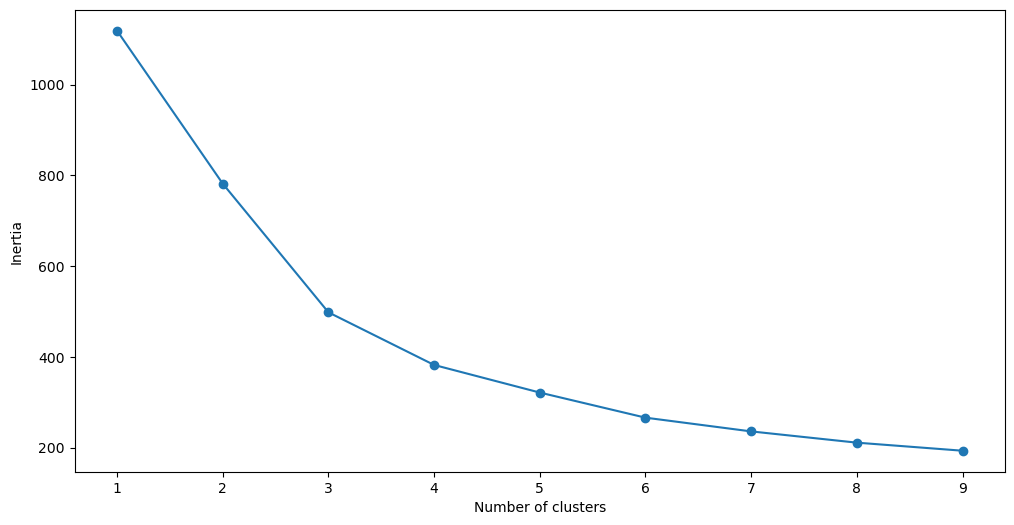

In [41]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [42]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(scaled_features)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [43]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.37141583822267055


In [44]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
frame

,recency,frequency,monetary_value,cluster
0,0,30,179.70,1
30,2,27,80.73,0
57,1,26,181.74,1
83,0,22,109.78,0
105,0,38,151.62,1
...,...,...,...,...
15573,0,25,199.75,1
15624,0,29,202.71,1
15653,2,26,155.74,1
15679,1,25,149.75,1


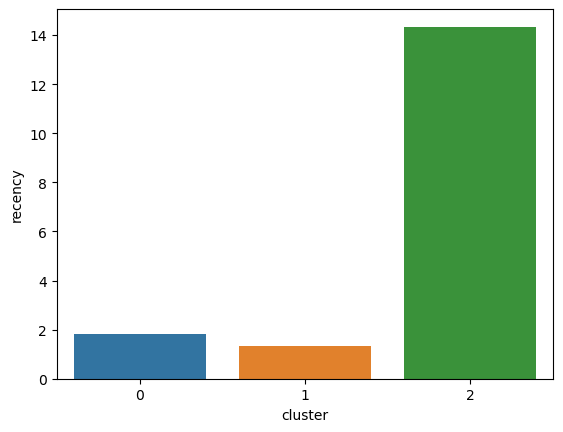

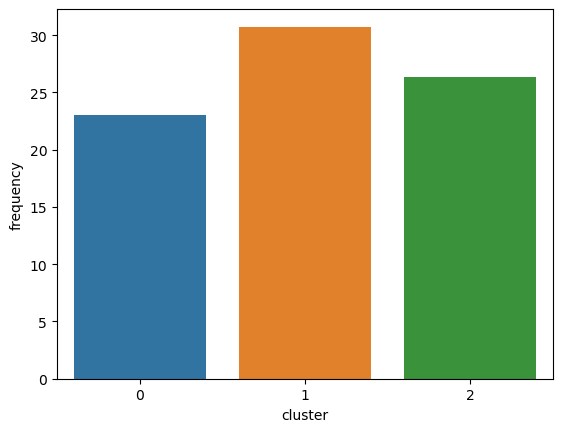

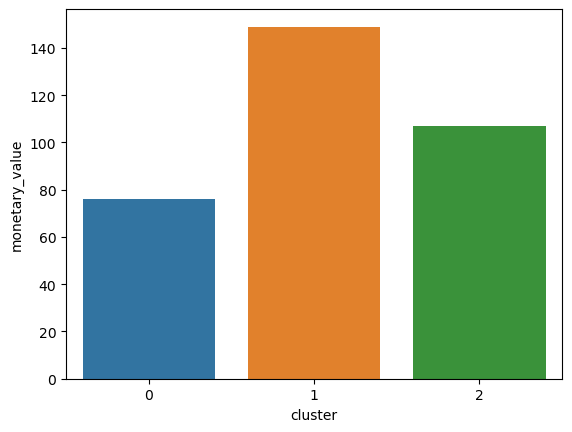

In [45]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

The customer segmentation of DVD Rental are down below: 

0 = Low recency, high frequency, moderate monetary value
1 = Low recency, high frequency, high monetary value
2 = High recency, high frequency, high monetary value 